Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Answer:

Difference:

K-Means: Partitions data into k clusters by minimizing the distance between points and cluster centroids. It needs the number of clusters in advance.

Hierarchical Clustering: Builds a tree (dendrogram) by either merging smaller clusters (agglomerative) or splitting larger ones (divisive). Doesn’t need the number of clusters upfront.

Use Cases:

K-Means → Customer segmentation in e-commerce (e.g., grouping buyers by spending behavior).

Hierarchical Clustering → Document clustering in NLP (to see topic relationships with a hierarchy).

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

Answer:

The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters.

Score ranges from -1 to +1.

+1 → point is well-matched to its cluster and far from others.

0 → point lies on the boundary.

-1 → point may be in the wrong cluster.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer:

Core Parameters of DBSCAN:

ε (Epsilon / Radius): Defines the neighborhood around a point. Smaller ε → tighter clusters; larger ε → broader clusters.

MinPts (Minimum Points): Minimum number of points required to form a dense region. Higher MinPts → stricter cluster formation.

Influence:

Together, they decide which points are core points (dense area), border points (on cluster edge), or noise (outliers).

The right balance of ε and MinPts is crucial for meaningful clusters.


Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Answer:

Feature scaling is super important because clustering algorithms rely on distance calculations (like Euclidean distance).

If features are on different scales (e.g., income in lakhs vs. age in years), the larger-scaled feature will dominate the clustering.

K-Means: Centroid calculation gets biased toward high-scale features.

DBSCAN: Neighborhood radius (ε) becomes inconsistent across dimensions.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?


Anwer:The Elbow Method is a visual technique to find the best number of clusters (k) in K-Means.

It plots Within-Cluster Sum of Squares (WCSS) vs. number of clusters.

As k increases, WCSS decreases (clusters fit data better).

At some point, the rate of improvement sharply slows down, forming an “elbow” shape.

That elbow point = optimal number of clusters (good balance between accuracy and simplicity).

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

Silhouette Score: 0.792


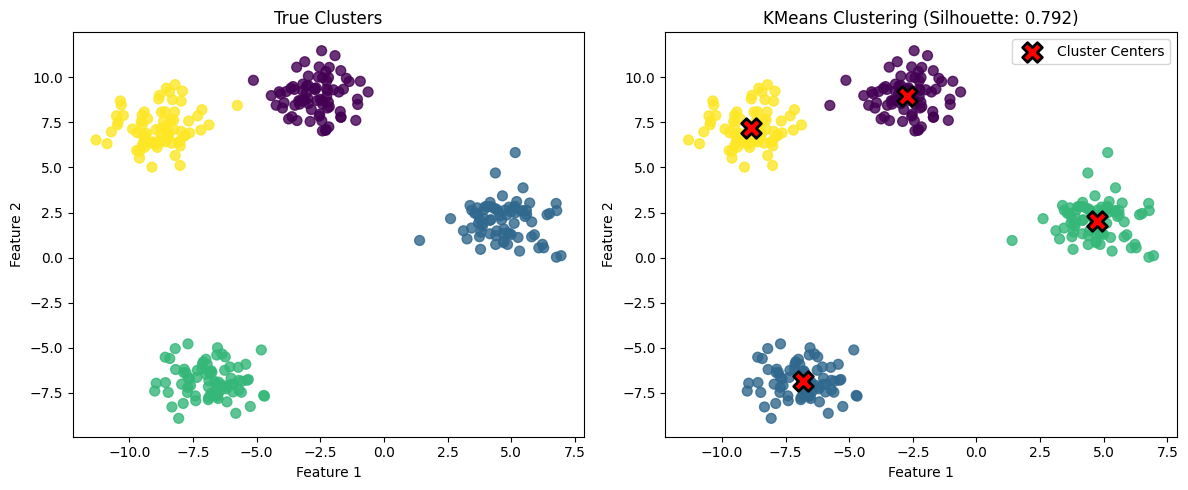


Cluster Centers:
Cluster 0: (-2.71, 8.97)
Cluster 1: (-6.83, -6.83)
Cluster 2: (4.72, 2.04)
Cluster 3: (-8.87, 7.17)

Points per cluster:
Cluster 0: 76 points
Cluster 1: 75 points
Cluster 2: 75 points
Cluster 3: 74 points


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Calculate silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: True clusters (if available)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.title('True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 2: KMeans clusters with centers
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200,
           edgecolors='black', linewidth=2, label='Cluster Centers')
plt.title(f'KMeans Clustering (Silhouette: {silhouette_avg:.3f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Print cluster centers information
print("\nCluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: ({center[0]:.2f}, {center[1]:.2f})")

# Count points in each cluster
unique, counts = np.unique(y_pred, return_counts=True)
print("\nPoints per cluster:")
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} points")

Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).


In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y_true = wine.target

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.0, min_samples=5)  # You can adjust these parameters
y_pred = dbscan.fit_predict(X_scaled)

# Analyze the results
unique_labels = np.unique(y_pred)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(y_pred == -1)

# Print results
print("Wine Dataset DBSCAN Clustering Results")
print("=" * 40)
print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Total number of data points: {len(X)}")
print(f"Unique labels found: {unique_labels}")

# Calculate silhouette score (excluding noise points for fair comparison)
if n_clusters > 1:
    # Filter out noise points for silhouette calculation
    non_noise_mask = y_pred != -1
    if np.sum(non_noise_mask) > 0:
        silhouette_avg = silhouette_score(X_scaled[non_noise_mask], y_pred[non_noise_mask])
        print(f"Silhouette Score (excluding noise): {silhouette_avg:.3f}")
    else:
        print("No non-noise points available for silhouette score calculation")
else:
    print("Not enough clusters to calculate silhouette score")

# Print cluster sizes
print("\nCluster sizes (including noise as cluster -1):")
for label in unique_labels:
    if label == -1:
        print(f"Noise points (label -1): {np.sum(y_pred == label)}")
    else:
        print(f"Cluster {label}: {np.sum(y_pred == label)} points")

# Optional: Compare with ground truth if needed
print(f"\nGround truth has {len(np.unique(y_true))} classes")

Wine Dataset DBSCAN Clustering Results
Number of clusters found (excluding noise): 0
Number of noise points: 178
Total number of data points: 178
Unique labels found: [-1]
Not enough clusters to calculate silhouette score

Cluster sizes (including noise as cluster -1):
Noise points (label -1): 178

Ground truth has 3 classes


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.



DBSCAN Results for Moon-shaped Data
Number of clusters found: 3
Number of outliers (noise): 2
Unique labels: [-1  0  1  2]
Silhouette Score: 0.314


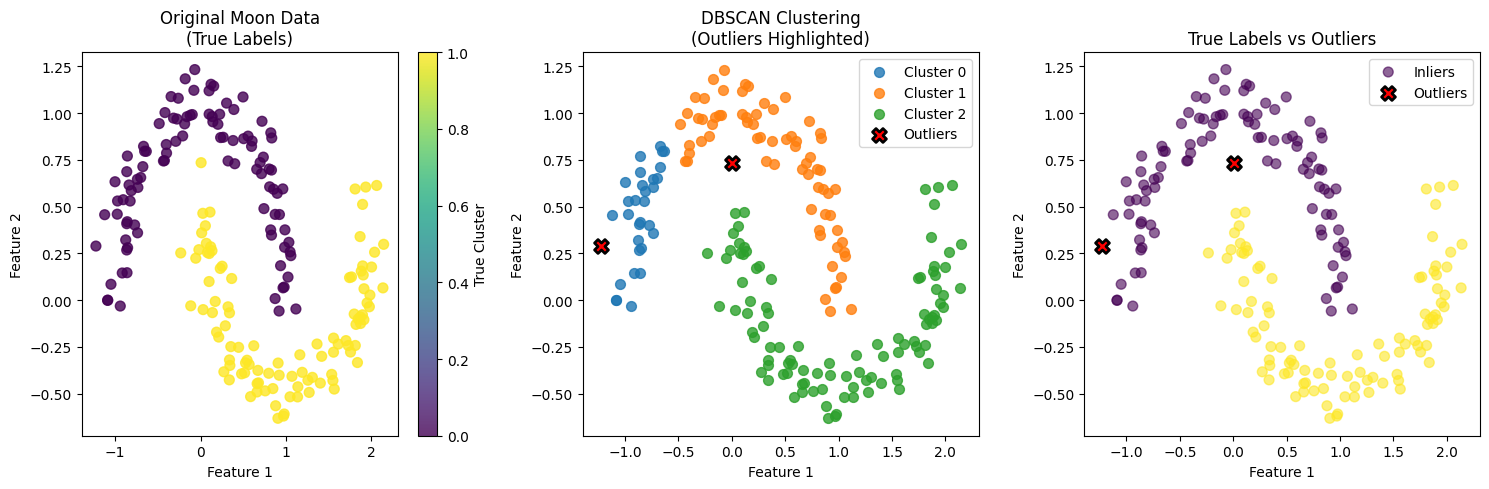


Cluster Statistics:
Outliers: 2 points
Cluster 0: 30 points
Cluster 1: 69 points
Cluster 2: 99 points

First 10 outlier indices: [ 78 197]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate moon-shaped synthetic data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Adjusted parameters for moon data
y_pred = dbscan.fit_predict(X)

# Analyze the results
unique_labels = np.unique(y_pred)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(y_pred == -1)

print("DBSCAN Results for Moon-shaped Data")
print("=" * 40)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of outliers (noise): {n_noise}")
print(f"Unique labels: {unique_labels}")

# Calculate silhouette score (excluding noise points)
if n_clusters > 1:
    non_noise_mask = y_pred != -1
    if np.sum(non_noise_mask) > 0:
        silhouette_avg = silhouette_score(X[non_noise_mask], y_pred[non_noise_mask])
        print(f"Silhouette Score: {silhouette_avg:.3f}")

# Create the visualization
plt.figure(figsize=(15, 5))

# Plot 1: Original moon data with true labels
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.title('Original Moon Data\n(True Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')

# Plot 2: DBSCAN results with outliers highlighted
plt.subplot(1, 3, 2)
# Plot regular clusters
for label in unique_labels:
    if label != -1:
        mask = y_pred == label
        plt.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {label}', s=50, alpha=0.8)
# Plot outliers with special highlighting
outlier_mask = y_pred == -1
plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1],
           c='red', marker='X', s=100, edgecolors='black',
           linewidth=2, alpha=1.0, label='Outliers')
plt.title('DBSCAN Clustering\n(Outliers Highlighted)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot 3: Side-by-side comparison
plt.subplot(1, 3, 3)
# Left half: True labels
plt.scatter(X[y_pred != -1, 0], X[y_pred != -1, 1], c=y_true[y_pred != -1],
           cmap='viridis', s=50, alpha=0.6, label='Inliers')
# Right half: Outliers
plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1],
           c='red', marker='X', s=100, edgecolors='black',
           linewidth=2, alpha=1.0, label='Outliers')
plt.title('True Labels vs Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Additional analysis
print("\nCluster Statistics:")
for label in unique_labels:
    if label == -1:
        print(f"Outliers: {np.sum(y_pred == label)} points")
    else:
        print(f"Cluster {label}: {np.sum(y_pred == label)} points")

# Show which points are outliers
print(f"\nFirst 10 outlier indices: {np.where(y_pred == -1)[0][:10]}")

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.


Wine Dataset Information:
Number of samples: 178
Number of features: 13
Number of true classes: 3
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']

PCA Explained Variance Ratio: [0.36198848 0.1920749 ]
Total Variance Explained: 0.554

Clustering Results:
Silhouette Score: 0.559
Adjusted Rand Index (vs true labels): 0.896


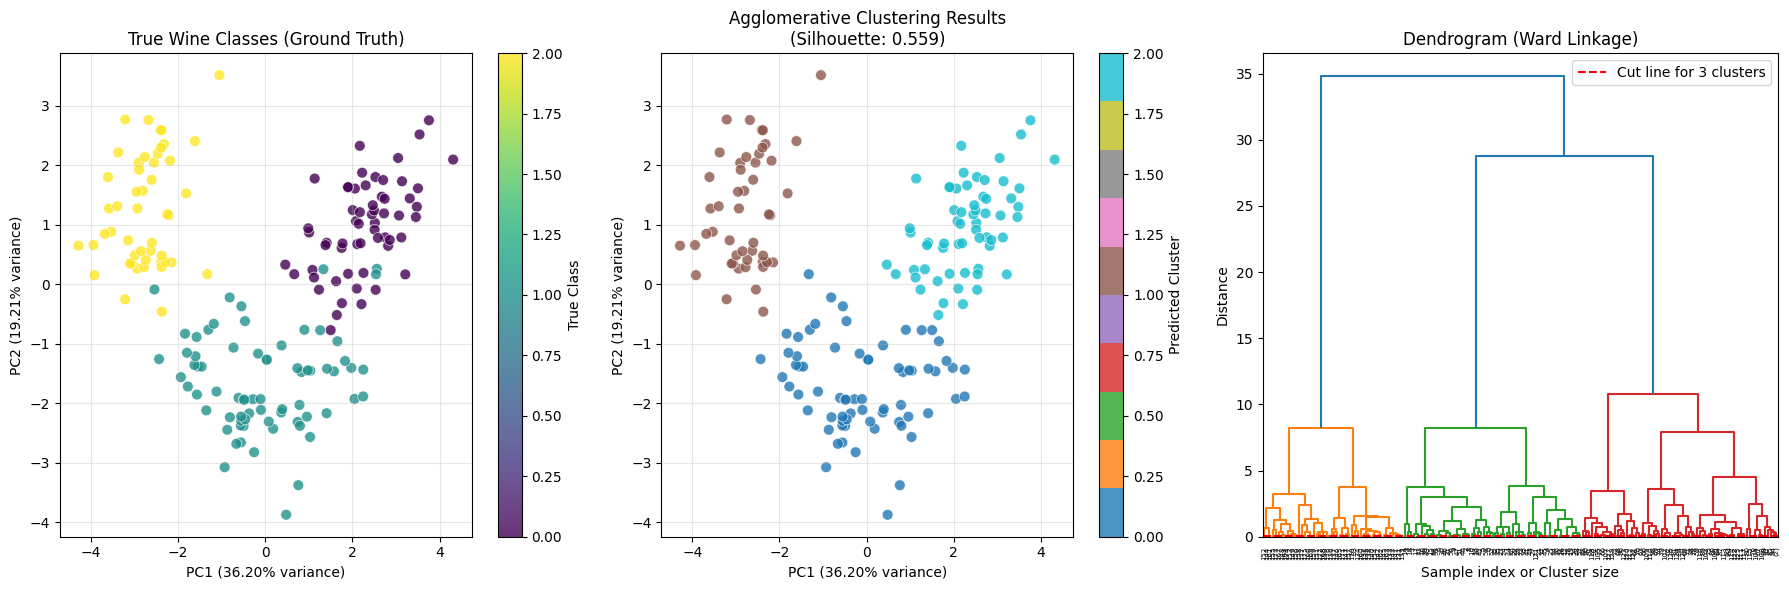


Cluster Distribution:
Predicted clusters:
  Cluster 0: 69 samples
  Cluster 1: 48 samples
  Cluster 2: 61 samples

True classes:
  class_0: 59 samples
  class_1: 71 samples
  class_2: 48 samples

Confusion Matrix (Predicted vs True):
[[ 1 67  1]
 [ 0  1 47]
 [58  3  0]]


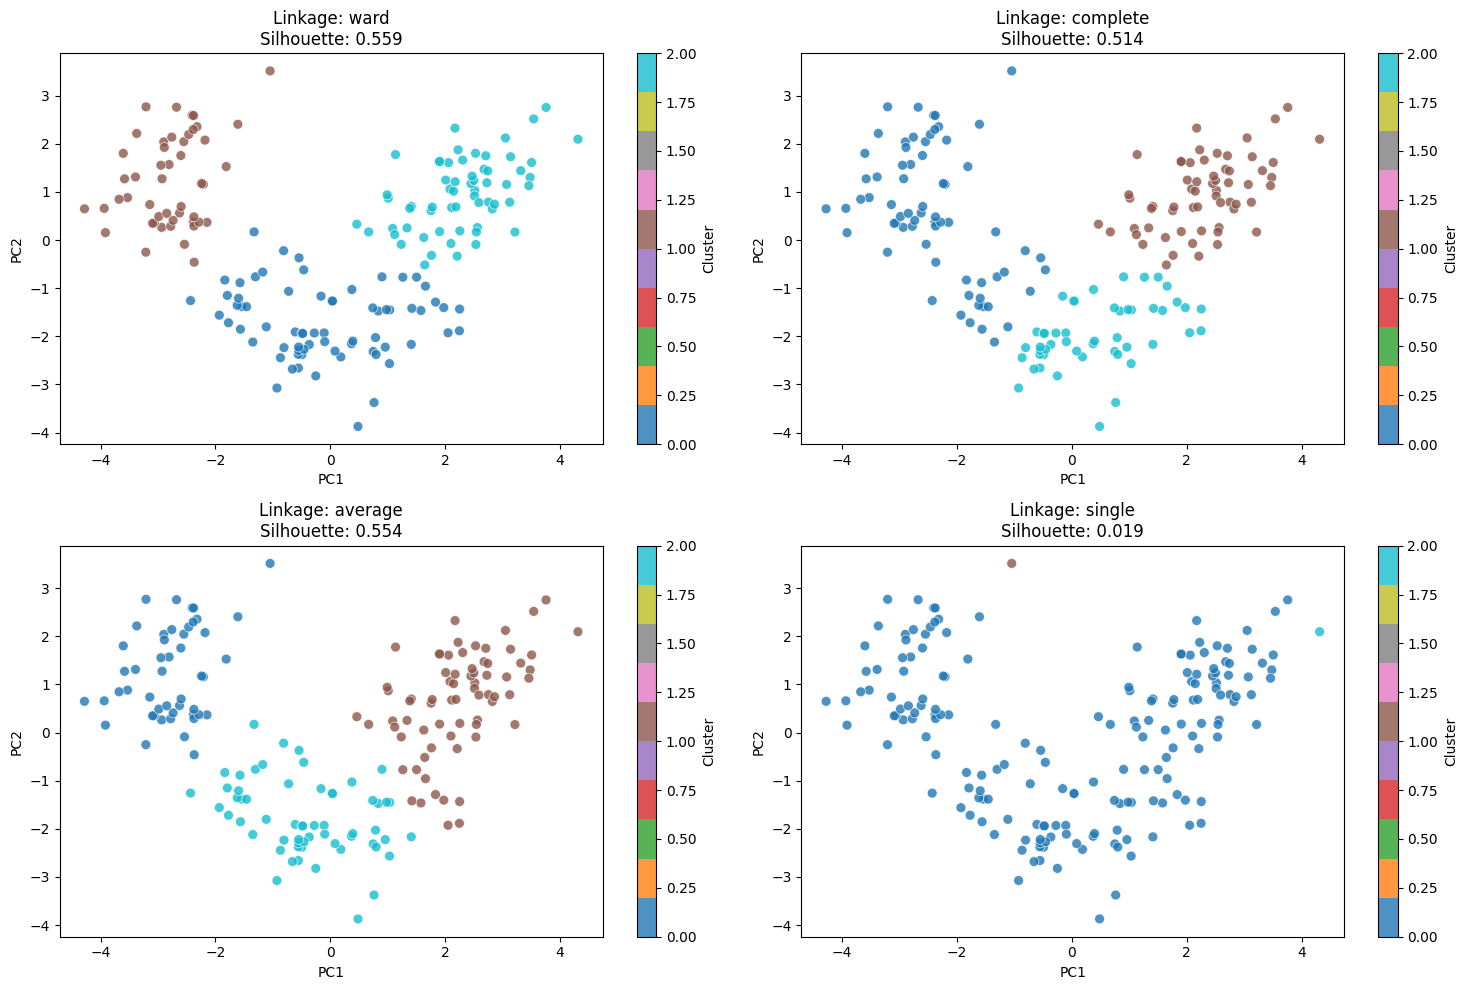

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import scipy.cluster.hierarchy as sch

# Load the Wine dataset
wine = load_wine()
X = wine.data
y_true = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("Wine Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of true classes: {len(np.unique(y_true))}")
print(f"Feature names: {feature_names}")
print(f"Target names: {target_names}")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.3f}")

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(
    n_clusters=3,  # Since we know there are 3 wine classes
    linkage='ward',  # Good for Euclidean distance
    metric='euclidean'
)

y_pred = agg_clustering.fit_predict(X_pca)

# Calculate evaluation metrics
silhouette_avg = silhouette_score(X_pca, y_pred)
ari_score = adjusted_rand_score(y_true, y_pred)

print(f"\nClustering Results:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Adjusted Rand Index (vs true labels): {ari_score:.3f}")

# Create the visualization
plt.figure(figsize=(18, 6))

# Plot 1: True labels (ground truth)
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis',
                     s=60, alpha=0.8, edgecolors='w', linewidth=0.5)
plt.title('True Wine Classes (Ground Truth)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter, label='True Class')
plt.grid(True, alpha=0.3)

# Plot 2: Agglomerative Clustering results
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='tab10',
                     s=60, alpha=0.8, edgecolors='w', linewidth=0.5)
plt.title('Agglomerative Clustering Results\n(Silhouette: {:.3f})'.format(silhouette_avg))
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter, label='Predicted Cluster')
plt.grid(True, alpha=0.3)

# Plot 3: Dendrogram
plt.subplot(1, 3, 3)
linkage_matrix = sch.linkage(X_pca, method='ward')
dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample index or Cluster size')
plt.ylabel('Distance')
# Fix the error by providing a fixed value for axhline when n_clusters is specified
plt.axhline(y=dendrogram['dcoord'][0][1] if n_clusters is not None else agg_clustering.distance_threshold,
            color='r', linestyle='--', label='Cut line for 3 clusters')
plt.legend()

plt.tight_layout()
plt.show()

# Additional analysis
print("\nCluster Distribution:")
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
unique_true, counts_true = np.unique(y_true, return_counts=True)

print("Predicted clusters:")
for cluster, count in zip(unique_pred, counts_pred):
    print(f"  Cluster {cluster}: {count} samples")

print("\nTrue classes:")
for class_id, count in zip(unique_true, counts_true):
    print(f"  {target_names[class_id]}: {count} samples")

# Compare clustering with true labels
print("\nConfusion Matrix (Predicted vs True):")
confusion_matrix = np.zeros((len(unique_pred), len(unique_true)))
for i, pred_label in enumerate(unique_pred):
    for j, true_label in enumerate(unique_true):
        confusion_matrix[i, j] = np.sum((y_pred == pred_label) & (y_true == true_label))

print(confusion_matrix.astype(int))

# Optional: Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    agg_cluster = AgglomerativeClustering(n_clusters=3, linkage=method)
    y_pred_method = agg_cluster.fit_predict(X_pca)
    score = silhouette_score(X_pca, y_pred_method)

    plt.subplot(2, 2, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_method, cmap='tab10',
                         s=50, alpha=0.8, edgecolors='w', linewidth=0.5)
    plt.title(f'Linkage: {method}\nSilhouette: {score:.3f}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.


Answer:

Goal: Segment customers based on purchase behavior for targeted marketing.

Steps:

Data Preparation

Clean missing values, remove duplicates.

Create features like total spend, frequency of purchase, average basket size, category preference.

Scale features (since K-Means/DBSCAN rely on distances).

Clustering Approach

K-Means: Good for clear, non-hierarchical clusters (e.g., “budget buyers,” “premium buyers,” “occasional shoppers”).

Evaluate with Elbow Method + Silhouette Score to choose k.

Alternatively, try Hierarchical Clustering if you want to visualize customer relationships.

Output / Use

Identify clusters: e.g.,

Cluster 1: Young, high spend → target with luxury promotions.

Cluster 2: Price-sensitive, frequent small buys → offer discounts.

Cluster 3: Rare buyers → send re-engagement campaigns.